# 2 body Kepler problem

We have an Hamiltonian system
$$\dot{y} = J^{-1} \nabla H(y) $$
with $y = (p,q) \in \mathbb{R}^{2d}$ and $J=\begin{pmatrix}0 & I \\ -I & 0 \end{pmatrix} \in M_{2d}(\mathbb{R})$

In this case  $d=2$ and we have the following hamiltonian with $p =(p_1,p_2)$ and $q =(q_1,q_2)$ 
\begin{equation}
H(p,q) = \frac{1}{2}\left\lVert  p\right\rVert_2^2 - \frac{1}{\left\lVert  q\right\rVert_2}
\end{equation}

Where we denote $\left\lVert  \cdot\right\rVert_2$ as the euclidean norm on $\mathbb{R}^{2d}$.

Thus we have

$$
\left\{\begin{matrix}
       \frac{\partial p}{\partial t} &=& -\frac{q}{\left\lVert  q\right\rVert_2^3} \\
       \frac{\partial q}{\partial t} &=& p\\
\end{matrix}\right.
$$


### Imports

In [1]:
import sys
import parareal as para
import RK2
import RK4
import StormerKepler as SK
import HamiltonianFunctions as func
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [10, 5]
plt.rcParams["figure.figsize"] = (20,3)


### Constants

In [2]:
T = 100
N = 999
delta_t = T/N
e = 0.1
y0 = np.double([0,np.sqrt((1+e)/(1-e)),1-e,0])
dtg = delta_t
dtf = dtg/100
epsilon = 1
tab_t = np.linspace(0, T, N+2)
print("T:",T)
print("N:",N)
print("delta_t:",delta_t)
print("dtg:", dtg)
print("dtf:",dtf)

T: 100
N: 999
delta_t: 0.1001001001001001
dtg: 0.1001001001001001
dtf: 0.001001001001001001


## Plot

In [3]:
%matplotlib inline
tab_y = para.parareal_bis(func.Kepler, SK.Stormer,SK.Stormer, T, y0, dtf, dtg, N)


sol_ex = SK.tab_Stormer(func.Kepler,0,T,y0,dtf)


k: 1
k: 2
k: 3
k: 4
k: 5
k: 6


## Error computation on parareal algorithm for harmonic oscillator

### Error on y

In [4]:
tab_err = para.err(tab_y,sol_ex)



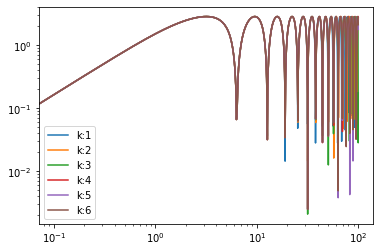

In [5]:
for k in range(2,len(tab_err)):
    plt.loglog(tab_t,np.abs(tab_err[k,:]),label =f"k:{k-1}")
    
plt.legend()

### Error on the Hamiltonian

In [6]:
Ha0 = 0.5*(y0[0]**2+y0[1]**2) - 1/np.sqrt(y0[2]**2 + y0[3]**2)
tab_Ha0 = Ha0*np.ones(len(tab_y[0]))
tab_Ha = para.Ha_err(tab_y,tab_Ha0,func.HaKepler)
kmax = len(tab_Ha)






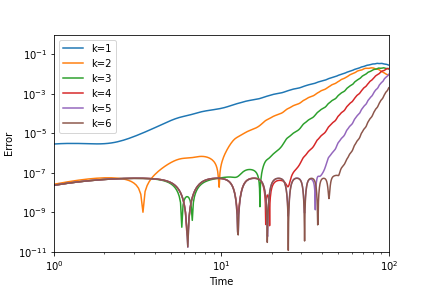

In [7]:
%matplotlib widget
#plt.loglog(tab_t,tab_Ha[0,:], label ="f solver")
#plt.loglog(tab_t,tab_Ha[1,:], label ="g solver")

for k in range(2,kmax):
    plt.loglog(tab_t,tab_Ha[k,:], label =f"k={k-1}")
    plt.xlabel('Time')
    plt.ylabel('Error')
plt.xlim(1,T)
plt.ylim(10**-11,1)
plt.legend()

In [8]:
plt.plot(tab_t,np.power(tab_t,2)/10**5.6,label='t^2')
plt.plot(tab_t,np.power(tab_t,4)/10**9.4,label='t^4')
plt.plot(tab_t,np.power(tab_t,6)/10**13.7,label='t^6')
plt.plot(tab_t,np.power(tab_t,8)/10**18,label='t^8')
plt.plot(tab_t,np.power(tab_t,10)/10**22,label='t^10')
plt.plot(tab_t,np.power(tab_t,12)/10**24,label='t^12')
plt.legend()
